# Information Metrics

This notebooks runs information theory metrics on time series signals, including several entropy measures. 

Measures of entropy generally measure the level of 'randomness' or complexity in a signal. 

Entropy measures explored here:
- approximate entropy: quantifies the unpredictability of a time series
- sample entropy: a modification of approxmiate entropy for physiological time series
    - the modifications of sample entropy make it data length independent
- permutation entropy: a measure of entropy based on the probabilities of sequences within the time series
    - Permutation entropy was introduced in 2002 by Bandt & Pompe
- spectral entropy: the entropy of the power spectrum

In all cases, smaller values of measured entropy indicate more regular time series. 

Notes:
- sample & approximate entroy are pretty similar, maybe don't need both (?)
- other metrics we don't currently consider: multiscale entropy, weighted permutation entropy
- there are important parameter inputs to these measures, that could be explored

ToDos:
- could condense the plots here (like in the Complexity notebook)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.methods import sample_entropy, perm_entropy, app_entropy, spectral_entropy
from apm.methods.settings import SA_ENT_PARAMS, PE_ENT_PARAMS, AP_ENT_PARAMS, SP_ENT_PARAMS

from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL

from apm.sim.settings import FS, SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Settings

In [3]:
# Custom settings
N_SIMS = 10

In [4]:
# Check settings for entropy measurs
print('Sample Entropy: \t', SA_ENT_PARAMS)
print('Permutation Entropy:\t', PE_ENT_PARAMS)
print('Approximate Entropy:\t', AP_ENT_PARAMS)
print('Spectral Entropy:\t', SP_ENT_PARAMS)

Sample Entropy: 	 {'order': 2}
Permutation Entropy:	 {'order': 3, 'delay': 1}
Approximate Entropy:	 {'order': 2}
Spectral Entropy:	 {'sf': 1000, 'method': 'fft'}


In [5]:
# Set the random seed
set_random_seed(111)

In [6]:
# Notebook Settings
SAVE_FIG = False

## Calculating Entropy Measures on Example Signals

In [7]:
print('Computed approximate entropy:')
print('  powerlaw: \t {:1.4f}'.format(app_entropy(SIG_AP, **AP_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(app_entropy(SIG_OSC, **AP_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(app_entropy(SIG_COMB, **AP_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(app_entropy(SIG_KN, **AP_ENT_PARAMS)))

Computed approximate entropy:
  powerlaw: 	 0.5299
  osc:      	 0.2010
  combined: 	 0.9730
  knee:     	 1.4853


In [8]:
print('Computed sample entropy:')
print('  powerlaw: \t {:1.4f}'.format(sample_entropy(SIG_AP, **SA_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(sample_entropy(SIG_OSC, **SA_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(sample_entropy(SIG_COMB, **SA_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(sample_entropy(SIG_KN, **SA_ENT_PARAMS)))

Computed sample entropy:
  powerlaw: 	 0.4852
  osc:      	 0.1629
  combined: 	 0.8816
  knee:     	 1.3683


In [9]:
print('Computed permutation entropy:')
print('  powerlaw: \t {:1.4f}'.format(perm_entropy(SIG_AP, **PE_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(perm_entropy(SIG_OSC, **PE_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(perm_entropy(SIG_COMB, **PE_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(perm_entropy(SIG_KN, **PE_ENT_PARAMS)))

Computed permutation entropy:
  powerlaw: 	 2.5230
  osc:      	 1.1414
  combined: 	 2.5214
  knee:     	 2.5155


In [10]:
print('Computed spectral entropy:')
print('  powerlaw: \t {:1.4f}'.format(spectral_entropy(SIG_AP, **SP_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(spectral_entropy(SIG_OSC, **SP_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(spectral_entropy(SIG_COMB, **SP_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(spectral_entropy(SIG_KN, **SP_ENT_PARAMS)))

Computed spectral entropy:
  powerlaw: 	 4.5093
  osc:      	 0.0000
  combined: 	 7.2174
  knee:     	 10.8323


## Entropy Simulations: Aperiodic Variations

Calculate entropy measures on simulated powerlaw signals, with and without oscillations. 

### Approximate Entropy

In [11]:
# Run simulations calculating approximate entropy across exponents
ap_ents = run_sims(sim_powerlaw, SIM_PARAMS_AP, app_entropy, AP_ENT_PARAMS, 
                   update='update_exp', values=EXPS, n_sims=N_SIMS)

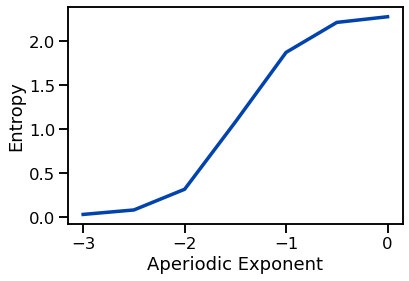

In [12]:
# Plot approximate entropy measures across exponent values
plot_lines(EXPS, ap_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_exp', file_path='info')

In [13]:
# Run simulations calculating approximate entropy across exponents, with an oscillation
ap_ents_comb = run_sims(sim_combined, SIM_PARAMS_COMB, app_entropy, AP_ENT_PARAMS, 
                        update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

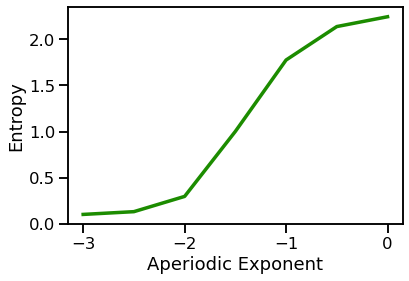

In [14]:
# Plot approximate entropy measures across exponent values, with an oscillation
plot_lines(EXPS, ap_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_comb', file_path='info')

#### Plot Aperiodic & Combined Together

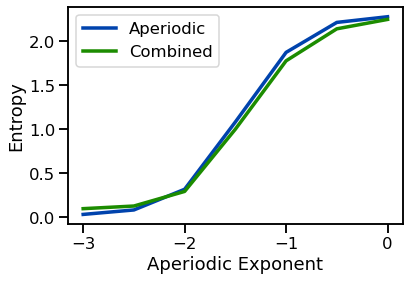

In [15]:
# Plot entropy measures for with & without oscillation together
plot_lines(EXPS, ap_ents, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, ap_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_both', file_path='info')

### Sample Entropy

In [16]:
# Run simulations calculating sample entropy across exponents
sa_ents = run_sims(sim_powerlaw, SIM_PARAMS_AP, sample_entropy, SA_ENT_PARAMS,
                   update='update_exp', values=EXPS, n_sims=N_SIMS)

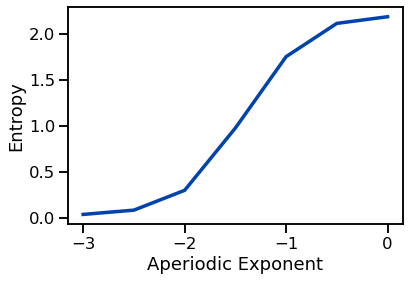

In [17]:
# Plot sample entropy measures across exponent values
plot_lines(EXPS, sa_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_exp', file_path='info')

In [18]:
# Run simulations calculating sample entropy across exponents, with an oscillation
sa_ents_comb = run_sims(sim_combined, SIM_PARAMS_COMB, sample_entropy, SA_ENT_PARAMS,
                        update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

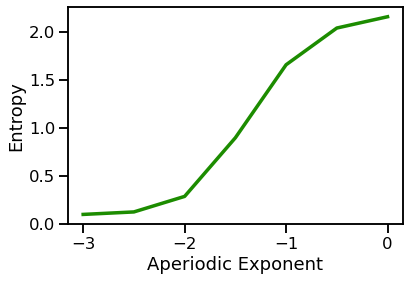

In [19]:
# Plot sample entropy measures across exponent values
plot_lines(EXPS, sa_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_comb', file_path='info')

#### Plot Aperiodic & Combined Together

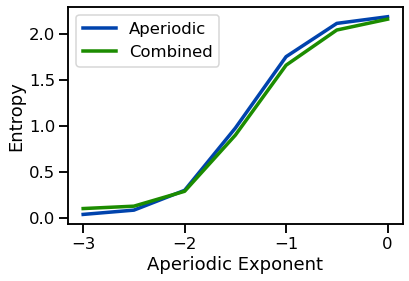

In [20]:
# Plot entropy measures for with & without oscillation together
plot_lines(EXPS, sa_ents, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, sa_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_both', file_path='info')

### Permutation Entropy

In [21]:
# Run simulations calculating permutation entropy across exponents
pe_ents = run_sims(sim_powerlaw, SIM_PARAMS_AP, perm_entropy, PE_ENT_PARAMS,
                   update='update_exp', values=EXPS, n_sims=N_SIMS)

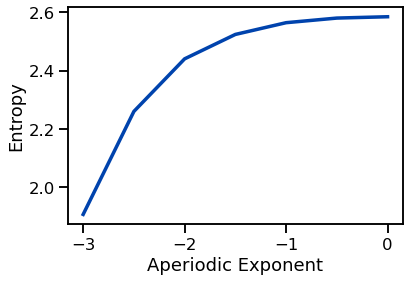

In [22]:
# Plot permutation entropy measures across exponent values
plot_lines(EXPS, pe_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_exp', file_path='info')

In [23]:
# Run simulations calculating permutation entropy across exponents, with an oscillation
pe_ents_comb = run_sims(sim_combined, SIM_PARAMS_COMB, perm_entropy, PE_ENT_PARAMS,
                        update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

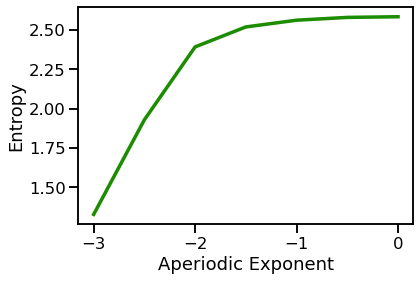

In [24]:
# Plot permutation entropy measures across exponent values, with an oscillation
plot_lines(EXPS, pe_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_comb', file_path='info')

#### Plot Aperiodic & Combined Together

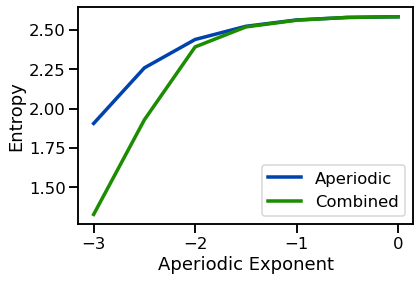

In [25]:
# Plot entropy measures for with & without oscillation together
plot_lines(EXPS, pe_ents, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, pe_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_both', file_path='info')

### Spectral Entropy

In [26]:
# Run simulations calculating spectral entropy across exponents
sp_ents = run_sims(sim_powerlaw, SIM_PARAMS_AP, spectral_entropy, SP_ENT_PARAMS, 
                   update='update_exp', values=EXPS, n_sims=N_SIMS)

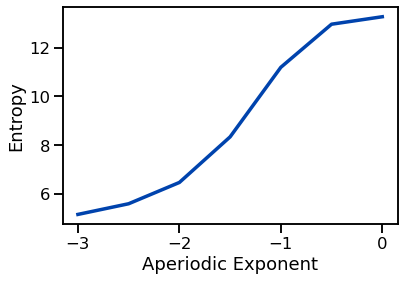

In [27]:
# Plot spectral entropy measures across exponent values
plot_lines(EXPS, sp_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_exp', file_path='info')

In [28]:
# Run simulations calculating spectral entropy across exponents, with an oscillation
sp_ents_comb = run_sims(sim_combined, SIM_PARAMS_COMB, spectral_entropy, SP_ENT_PARAMS, 
                        update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

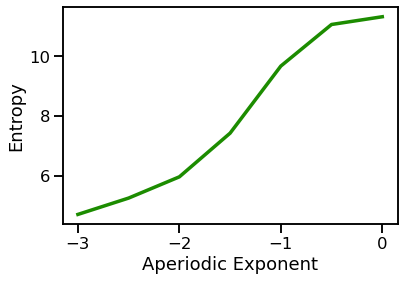

In [29]:
# Plot spectral entropy measures across exponent values, with an oscillation
plot_lines(EXPS, sp_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_comb', file_path='info')

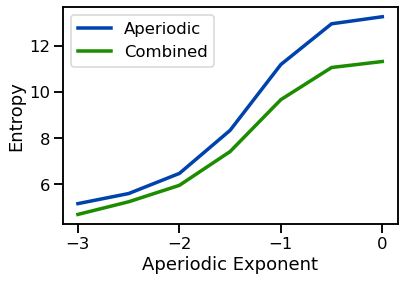

In [30]:
# Plot spectral entropy measures for with & without oscillation together
plot_lines(EXPS, sp_ents, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, sp_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_both', file_path='info')

## Entropy Simulations - Periodic Variations

Calculate entropy measures on simulated combined signals, with an oscillation and powerlaw components, across variations of oscillatory parameters. 

#### Approximate Entropy

In [31]:
# Run simulations calculating approximate entropy across oscillation frequency
ap_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, app_entropy, AP_ENT_PARAMS,
                        update='update_freq', values=FREQS, n_sims=N_SIMS)

In [32]:
# Run simulations calculating approximate entropy across oscillation power
ap_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, app_entropy, AP_ENT_PARAMS,
                       update='update_pow', values=POWERS, n_sims=N_SIMS)

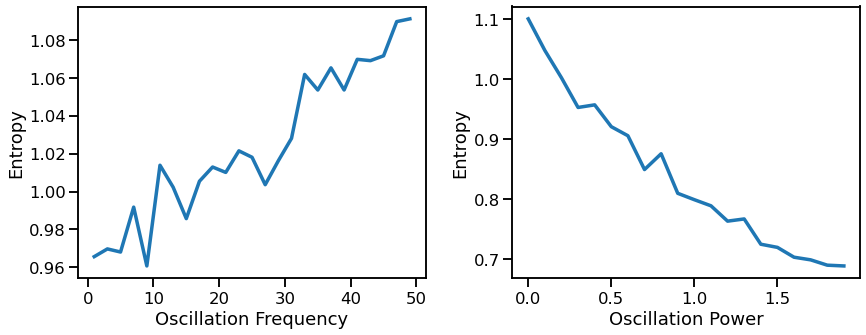

In [33]:
# Plot effect of oscillation variations on approximate entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, ap_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy', ax=axes[0])
plot_lines(POWERS, ap_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Entropy', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_power', file_path='info')

#### Sample Entropy

In [34]:
# Run simulations calculating sample entropy across oscillation frequency
sa_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, sample_entropy, SA_ENT_PARAMS,
                        update='update_freq', values=FREQS, n_sims=N_SIMS)

In [35]:
# Run a set of simulations, calculating sample entropy across oscillation power
sa_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, sample_entropy, SA_ENT_PARAMS,
                       update='update_pow', values=POWERS, n_sims=N_SIMS)

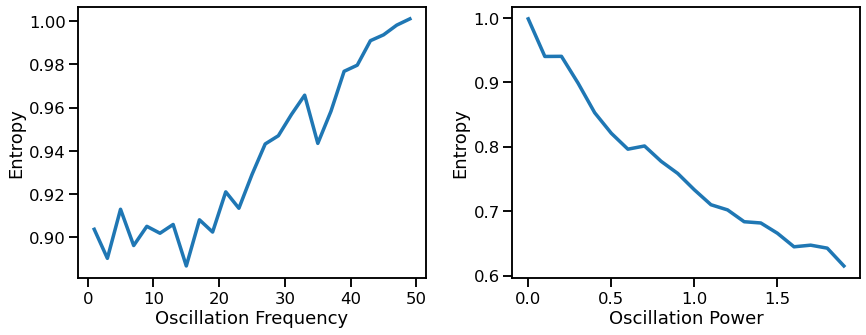

In [36]:
# Plot effect of oscillation variation on sample entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, sa_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy', ax=axes[0])
plot_lines(POWERS, sa_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Entropy', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='se_osc_both', file_path='info')

#### Permutation Entropy

In [37]:
# Run a set of simulations, calculating permutation entropy across oscillation frequency
pe_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, perm_entropy, PE_ENT_PARAMS,
                        update='update_freq', values=FREQS, n_sims=N_SIMS)

In [38]:
# Run simulations calculating permutation entropy across oscillation power
pe_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, perm_entropy, PE_ENT_PARAMS,
                       update='update_pow', values=POWERS, n_sims=N_SIMS)

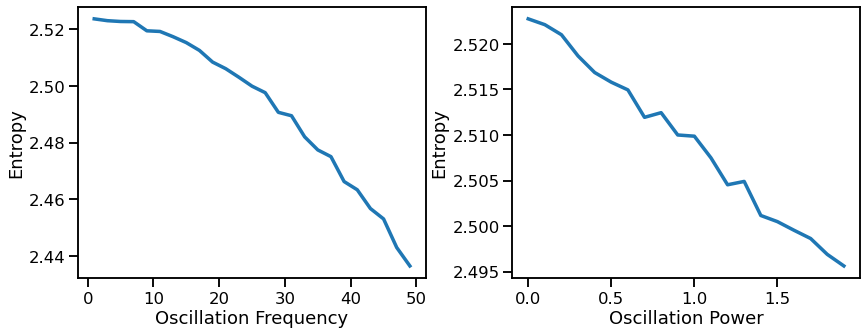

In [39]:
# Plot effect of oscillation variation on sample entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, pe_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy', ax=axes[0])
plot_lines(POWERS, pe_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Entropy', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='pe_osc_both', file_path='info')

#### Spectral Entropy

In [40]:
# Run simulations calculating spectral entropy across oscillation frequency
sp_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, spectral_entropy, SP_ENT_PARAMS,
                        update='update_freq', values=FREQS, n_sims=N_SIMS)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)


In [41]:
# Run simulations calculating spectral entropy across oscillation power
sp_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, spectral_entropy, SP_ENT_PARAMS,
                       update='update_pow', values=POWERS, n_sims=N_SIMS)

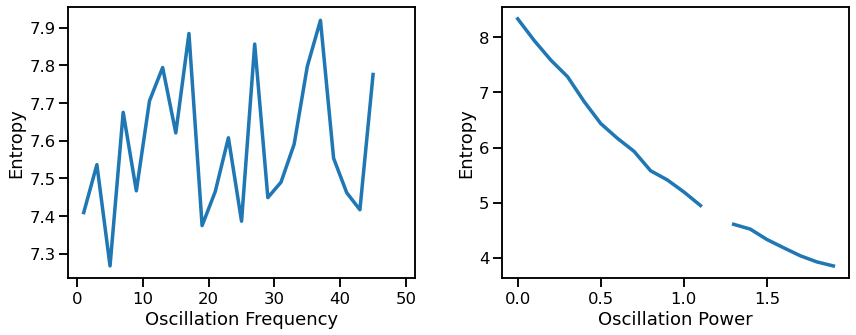

In [42]:
# Plot effect of oscillation variation on sample entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, sp_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy', ax=axes[0])
plot_lines(POWERS, sp_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Entropy', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_both', file_path='info')

## Conclusions

From the simulations above, we can summarize some general patterns:
- As expected, oscillatory signals (which are regular / predictable) have low entropy levels
- Entropy is generally higher for lower aperiodic exponents, but the relationship is non-linear
- In general, in combined signals, the presence of an oscillation decreases entropy, but to what extent depends on the estimate